In [1]:
import gc
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from minepy import MINE
from sklearn.feature_selection import RFE
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import KFold
from hyperopt import STATUS_OK, tpe, hp, Trials, fmin
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import gc
gc.collect()

7

In [3]:
X = pd.read_csv('./new_features2/X_500features.csv', nrows=4195)
X_test = pd.read_csv('./new_features2/X_test_500features.csv')
y = pd.read_csv('./new_features2/y.csv', nrows=4195)

In [4]:
X.shape

(4195, 500)

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5.101106,104.0,-98.0,74836.577199,104.0,6.488552,3.664663,11.207151,4.361407,-98.0,...,-7.860681,10.582723,9.457118,9.457118,0.741542,5.153231,1.201234,0.023995,6.173729,-6.104983
1,6.588824,181.0,-154.0,74891.736232,181.0,7.305233,5.493071,3.976750,3.667890,-154.0,...,-7.063668,8.318213,9.607402,6.984417,-22.075835,5.184115,1.224181,4.262065,6.210645,-6.261931
2,6.967397,140.0,-106.0,75099.224451,140.0,6.104836,8.603696,8.454717,9.493983,-87.0,...,-8.035454,8.776084,10.419514,10.046443,0.479100,5.222436,1.218019,0.052115,6.278418,-6.279816
3,6.922305,197.0,-199.0,74933.991879,199.0,6.238109,5.652442,6.866177,4.364430,-63.0,...,-7.138573,8.726227,8.242314,8.242314,-0.929922,5.176995,1.208627,0.040998,6.240451,-6.229007
4,7.301110,145.0,-126.0,75010.016046,145.0,5.323830,7.694506,5.164594,11.404900,-96.0,...,-8.621014,13.849403,10.597966,8.343786,-0.799800,5.147129,1.208314,0.124336,6.186363,-6.301428
5,5.434111,142.0,-144.0,75045.710253,144.0,4.442140,5.145255,3.664553,5.529390,-50.0,...,-9.031028,8.539994,8.579509,7.544792,-8.449854,5.130916,1.213087,1.657927,6.238678,-6.243041
6,5.687823,120.0,-78.0,75084.513678,120.0,5.944368,5.386872,3.213679,3.682430,-70.0,...,-7.240551,14.917656,10.703940,8.201473,5.623099,5.204454,1.215099,0.070302,6.296409,-6.244213
7,5.854512,139.0,-134.0,75066.009998,139.0,6.069746,7.078177,7.915799,3.410183,-89.0,...,-6.890992,10.618472,9.534357,6.934684,-1.009374,5.182695,1.206328,0.079639,6.321289,-6.194756
8,7.789643,168.0,-156.0,74992.566175,168.0,9.288044,5.993102,12.923598,3.912853,-156.0,...,-8.117470,11.393008,24.470656,8.088160,-2.972137,5.220050,1.221358,0.551299,6.402529,-6.331423
9,6.890459,152.0,-126.0,74902.631244,152.0,9.012695,4.944025,4.012557,3.574409,-126.0,...,-7.541294,11.095436,8.971652,8.971652,0.349032,5.222311,1.214520,0.090123,6.327391,-6.349857


In [6]:
estimator = GradientBoostingRegressor()
selector = RFE(estimator, n_features_to_select=300, step=50, verbose=10000)
selector = selector.fit(X, y.values.reshape(-1))

Fitting estimator with 500 features.
Fitting estimator with 450 features.
Fitting estimator with 400 features.
Fitting estimator with 350 features.


In [7]:
X = selector.transform(X)
X_test = selector.transform(X_test)

In [8]:
X.shape

(4195, 300)

In [6]:
NUM_EVALS = 1000
N_FOLDS = 5
XGB_MAX_LEAVES = 2**12 
XGB_MAX_DEPTH = 50
EVAL_METRIC_XGB_REG = 'mae'
LGBM_MAX_LEAVES = 2**11
LGBM_MAX_DEPTH = 35
EVAL_METRIC_LGBM_REG = 'mae'
#CATBOOST PARAMETERS
CB_MAX_DEPTH = 8 #maximum tree depth in CatBoost
OBJECTIVE_CB_REG = 'MAE'

In [9]:
def quick_hyperopt(data, labels, package='lgbm', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #LightGBM
    #==========
    
    if package=='lgbm':
        
        print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth',
                          'num_leaves',
                          'max_bin',
                          'min_data_in_leaf',
                          'min_data_in_bin']
        
        def objective(space_params):
            
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
            
            #extract nested conditional parameters
            if space_params['boosting']['boosting'] == 'goss':
                top_rate = space_params['boosting'].get('top_rate')
                other_rate = space_params['boosting'].get('other_rate')
                #0 <= top_rate + other_rate <= 1
                top_rate = max(top_rate, 0)
                top_rate = min(top_rate, 0.5)
                other_rate = max(other_rate, 0)
                other_rate = min(other_rate, 0.5)
                space_params['top_rate'] = top_rate
                space_params['other_rate'] = other_rate
            
            subsample = space_params['boosting'].get('subsample', 1.0)
            space_params['boosting'] = space_params['boosting']['boosting']
            space_params['subsample'] = subsample
            
            #for classification, set stratified=True and metrics=EVAL_METRIC_LGBM_CLASS
            cv_results = lgb.cv(space_params, train, num_boost_round=100, nfold = N_FOLDS, stratified=False,
                                early_stopping_rounds=100, metrics=EVAL_METRIC_LGBM_REG, seed=42)
            
            best_loss = cv_results['l1-mean'][-1] #'l2-mean' for rmse
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['auc-mean'][-1]
            #if necessary, replace 'auc-mean' with '[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = lgb.Dataset(data, labels)
                
        #integer and string parameters, used with hp.choice()
        boosting_list = [{'boosting': 'gbdt',
                          'subsample': hp.uniform('subsample', 0.5, 1)},
                         {'boosting': 'goss',
                          'subsample': 1.0,
                         'top_rate': hp.uniform('top_rate', 0, 0.5),
                         'other_rate': hp.uniform('other_rate', 0, 0.5)}] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['MAE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc'] #modify as required for other classification metrics
        objective_list_reg = ['huber',  'gamma', 'tweedie', 'fair']
        objective_list_class = ['binary', 'cross_entropy']
        #for classification set objective_list = objective_list_class
        objective_list = objective_list_reg

        space ={'boosting' : hp.choice('boosting', boosting_list),
                'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
                'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
                'max_bin': hp.quniform('max_bin', 32, 255, 1),
                'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
                'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
                'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
                'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
                'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'metric' : hp.choice('metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
                'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
            }
        
        #optional: activate GPU for LightGBM
        #follow compilation steps here:
        #https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm/
        #then uncomment lines below:
        #space['device'] = 'gpu'
        #space['gpu_platform_id'] = 0,
        #space['gpu_device_id'] =  0

        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
                
        #fmin() will return the index of values chosen from the lists/arrays in 'space'
        #to obtain actual values, index values are used to subset the original lists/arrays
        best['boosting'] = boosting_list[best['boosting']]['boosting']#nested dict, index twice
        best['metric'] = metric_list[best['metric']]
        best['objective'] = objective_list[best['objective']]
                
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, num_boost_round=100, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_REG],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
            best_loss = cv_results['test-mae-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree', 'gblinear'] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['mae'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:linear']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_reg
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : 4
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
        
        
    #==========
    #CatBoost
    #==========
    
    if package=='cb':
        
        print('Running {} rounds of CatBoost parameter optimisation:'.format(num_evals))
        
        #clear memory 
        gc.collect()
            
        integer_params = ['depth',
                          #'one_hot_max_size', #for categorical data
                          #'min_data_in_leaf',
                          'max_bin']
        
        def objective(space_params):
                        
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract nested conditional parameters
            if space_params['bootstrap_type']['bootstrap_type'] == 'Bayesian':
                bagging_temp = space_params['bootstrap_type'].get('bagging_temperature')
                space_params['bagging_temperature'] = bagging_temp
                
            #if space_params['grow_policy']['grow_policy'] == 'LossGuide':
            #    max_leaves = space_params['grow_policy'].get('max_leaves')
            #    space_params['max_leaves'] = int(max_leaves)
                
            space_params['bootstrap_type'] = space_params['bootstrap_type']['bootstrap_type']
            #space_params['grow_policy'] = space_params['grow_policy']['grow_policy']
                           
            #random_strength cannot be < 0
            space_params['random_strength'] = max(space_params['random_strength'], 0)
            #fold_len_multiplier cannot be < 1
            space_params['fold_len_multiplier'] = max(space_params['fold_len_multiplier'], 1)
                       
            #for classification set stratified=True
            cv_results = cb.cv(train, space_params, fold_count=N_FOLDS, 
                             early_stopping_rounds=25, stratified=False, partition_random_seed=42)
           
            best_loss = cv_results['test-MAE-mean'].iloc[-1] #'test-RMSE-mean' for RMSE
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = cv_results['test-Logloss-mean'].iloc[-1]
            #if necessary, replace 'test-Logloss-mean' with 'test-[your-preferred-metric]-mean'
            
            return{'loss':best_loss, 'status': STATUS_OK}
        
        train = cb.Pool(data, labels.astype('float32'))
        
        #integer and string parameters, used with hp.choice()
        bootstrap_type = [{'bootstrap_type':'Bayesian',
                            'bagging_temperature' : hp.loguniform('bagging_temperature', np.log(1), np.log(50))},
                          {'bootstrap_type':'Bernoulli'}] 
        LEB = ['No', 'AnyImprovement'] #remove 'Armijo' if not using GPU
        #score_function = ['Correlation', 'L2', 'NewtonCorrelation', 'NewtonL2']
        #grow_policy = [{'grow_policy':'SymmetricTree'},
        #               {'grow_policy':'Depthwise'},
        #               {'grow_policy':'Lossguide',
        #                'max_leaves': hp.quniform('max_leaves', 2, 32, 1)}]
        eval_metric_list_reg = ['MAE']
        #for classification change line below to 'eval_metric_list = eval_metric_list_class'
        eval_metric_list = eval_metric_list_reg
                
        space ={'depth': hp.quniform('depth', 2, CB_MAX_DEPTH, 1),
                'max_bin' : 254, #if using CPU just set this to 254
                'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0, 5),
                #'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 1, 50, 1),
                'random_strength' : hp.loguniform('random_strength', np.log(0.005), np.log(5)),
                #'one_hot_max_size' : hp.quniform('one_hot_max_size', 2, 16, 1), #uncomment if using categorical features
                'bootstrap_type' : hp.choice('bootstrap_type', bootstrap_type),
                'learning_rate' : hp.uniform('learning_rate', 0.05, 0.25),
                'eval_metric' : hp.choice('eval_metric', eval_metric_list),
                'objective' : OBJECTIVE_CB_REG,
                #'score_function' : hp.choice('score_function', score_function), #crashes kernel - reason unknown
                'leaf_estimation_backtracking' : hp.choice('leaf_estimation_backtracking', LEB),
                #'grow_policy': hp.choice('grow_policy', grow_policy),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),# CPU only
                'fold_len_multiplier' : hp.loguniform('fold_len_multiplier', np.log(1.01), np.log(2.5)),
                'od_type' : 'Iter',
                'od_wait' : 25,
                'task_type' : 'CPU',
                'verbose' : 0
            }
        
        #optional: run CatBoost without GPU
        #uncomment line below
        #space['task_type'] = 'CPU'
            
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        #unpack nested dicts first
        best['bootstrap_type'] = bootstrap_type[best['bootstrap_type']]['bootstrap_type']
        #best['grow_policy'] = grow_policy[best['grow_policy']]['grow_policy']
        best['eval_metric'] = eval_metric_list[best['eval_metric']]
        
        #best['score_function'] = score_function[best['score_function']] 
        best['leaf_estimation_method'] = LEM[best['leaf_estimation_method']] #CPU only
        best['leaf_estimation_backtracking'] = LEB[best['leaf_estimation_backtracking']]        
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)

In [11]:
lgb_params = quick_hyperopt(X, y, package='lgbm', num_evals=1000)

Running 1000 rounds of LightGBM parameter optimisation:
100%|█| 1000/1000 [53:52<00:00,  4.20s/it, best loss: 2.0347461901644968] 
{bagging_fraction: 0.8300000000000001
boosting: gbdt
feature_fraction: 0.85
lambda_l1: 0.5222692892330185
lambda_l2: 3.9874917442252356
learning_rate: 0.06618607235359975
max_bin: 36
max_depth: 4
metric: MAE
min_data_in_bin: 94
min_data_in_leaf: 6
min_gain_to_split: 2.6
num_leaves: 1806
objective: fair
subsample: 0.9635880449972379}


In [12]:
lgb_params

{'bagging_fraction': 0.8300000000000001,
 'boosting': 'gbdt',
 'feature_fraction': 0.85,
 'lambda_l1': 0.5222692892330185,
 'lambda_l2': 3.9874917442252356,
 'learning_rate': 0.06618607235359975,
 'max_bin': 36,
 'max_depth': 4,
 'metric': 'MAE',
 'min_data_in_bin': 94,
 'min_data_in_leaf': 6,
 'min_gain_to_split': 2.6,
 'num_leaves': 1806,
 'objective': 'fair',
 'subsample': 0.9635880449972379}

In [ ]:
# lgb_params = {'bagging_fraction': 0.7000000000000001,
#  'boosting': 'gbdt',
#  'feature_fraction': 0.8,
#  'lambda_l1': 2.916232531193822,
#  'lambda_l2': 1.9790935798285343,
#  'learning_rate': 0.04044166058712046,
#  'max_bin': 255,
#  'max_depth': 9,
#  'metric': 'MAE',
#  'min_data_in_bin': 177,
#  'min_data_in_leaf': 1,
#  'min_gain_to_split': 0.44,
#  'num_leaves': 1065,
#  'objective': 'gamma',
#  'subsample': 0.5607248110629217}

In [13]:
X = pd.DataFrame(X)
X_test = pd.DataFrame(X_test)

MAE = 0
lgb_preds = np.zeros(len(X_test))
oof_lgb = np.zeros(len(X))
scores = []

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(y)):
#     print(train_idx)
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    model = lgb.LGBMRegressor(**lgb_params, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=1000)
    val_preds = model.predict(X_valid)
    oof_lgb[valid_idx] = val_preds
    MAE += mean_absolute_error(y_valid, val_preds) / n_fold
    lgb_preds += model.predict(X_test, num_iteration=model.best_iteration_) / n_fold
    scores.append(mean_absolute_error(y_valid, val_preds))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[57]	training's l1: 1.74404	valid_1's l1: 2.07752
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[108]	training's l1: 1.60142	valid_1's l1: 2.06269
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[83]	training's l1: 1.64278	valid_1's l1: 2.11931
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[65]	training's l1: 1.74146	valid_1's l1: 1.97812
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[70]	training's l1: 1.73937	valid_1's l1: 1.92368
CV score: 2.0322658371903803, std: 0.07109434530483263


In [14]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = lgb_preds
submission.to_csv('./new_features3/lgb_300features_1000.csv', index=True)

In [15]:
pd.DataFrame(oof_lgb).to_csv('./new_features3/oof_lgb_300features_1000.csv', index=False)

In [17]:
xgb_params = quick_hyperopt(X, y, package='xgb', num_evals=100, diagnostic=False)

Running 100 rounds of XGBoost parameter optimisation:
100%|█| 100/100 [38:22<00:00, 35.96s/it, best loss: 2.0545701999999997] 
{boosting: gbtree
colsample_bylevel: 0.49
colsample_bynode: 0.98
colsample_bytree: 0.62
eval_metric: mae
gamma: 3.158681806910307
learning_rate: 0.03393577499230192
max_depth: 9
min_child_weight: 3.169689048009865
objective: reg:linear
reg_alpha: 3.3711503247217967
reg_lambda: 2.2883151114261646
subsample: 0.6000000000000001
tree_method: exact}


In [18]:
xgb_params

{'boosting': 'gbtree',
 'colsample_bylevel': 0.49,
 'colsample_bynode': 0.98,
 'colsample_bytree': 0.62,
 'eval_metric': 'mae',
 'gamma': 3.158681806910307,
 'learning_rate': 0.03393577499230192,
 'max_depth': 9,
 'min_child_weight': 3.169689048009865,
 'objective': 'reg:linear',
 'reg_alpha': 3.3711503247217967,
 'reg_lambda': 2.2883151114261646,
 'subsample': 0.6000000000000001,
 'tree_method': 'exact'}

In [19]:
MAE = 0
xgb_preds = np.zeros(len(X_test))
oof_xgb = np.zeros(len(X))
scores = []

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(y)):
#     print(train_idx)
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_preds = model.predict(X_valid)
    oof_xgb[valid_idx] = val_preds
    MAE += mean_absolute_error(y_valid, val_preds) / n_fold
    xgb_preds += model.predict(X_test) / n_fold
    scores.append(mean_absolute_error(y_valid, val_preds))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

[0]	validation_0-mae:5.0483	validation_1-mae:5.05045
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[86]	validation_0-mae:1.20699	validation_1-mae:2.08795

[0]	validation_0-mae:5.00921	validation_1-mae:5.19502
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[91]	validation_0-mae:1.17061	validation_1-mae:2.08309

[0]	validation_0-mae:5.0517	validation_1-mae:5.03655
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[100]	validation_0-mae:1.11655	validation_1-mae:2.09707

[0]	validation_0-mae:5.02391	validation_1-mae:5.14377
Multiple eval metrics have been passed: 'validation_1-mae' will b

In [20]:
X.shape

(4195, 300)

In [21]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = xgb_preds
submission.to_csv('./new_features3/xgb_300features_1000.csv', index=True)

In [22]:
pd.DataFrame(oof_xgb).to_csv('./new_features3/oof_xgb_300features_1000.csv')

In [ ]:
X = pd.read_csv('./new_features2/X_700features.csv')
X_test = pd.read_csv('./new_features2/X_test_700features.csv')

In [10]:
cb_params = quick_hyperopt(X, y, package='cb', num_evals=10, diagnostic=False)

Running 10 rounds of CatBoost parameter optimisation:
  0%|                | 0/10 [00:00<?, ?it/s, best loss: ?]


KeyboardInterrupt: 

In [ ]:
xgb_params

In [ ]:
MAE = 0
xgb_preds = np.zeros(len(X_test))
oof_xgb = np.zeros(len(X))
scores = []

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(y)):
#     print(train_idx)
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_preds = model.predict(X_valid)
    oof_xgb[valid_idx] = val_preds
    MAE += mean_absolute_error(y_valid, val_preds) / n_fold
    xgb_preds += model.predict(X_test) / n_fold
    scores.append(mean_absolute_error(y_valid, val_preds))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

In [ ]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = xgb_preds
submission.to_csv('./new_features2/xgb_700features_1000.csv', index=True)

In [ ]:
pd.DataFrame(oof_xgb).to_csv('./new_features2/oof_xgb_700features_1000.csv')

In [ ]:
rf_params1 = {'n_estimators': range(600, 1001, 100)}
gsearch1 = GridSearchCV(RandomForestRegressor(random_state=10),
                        param_grid=rf_params1, scoring='neg_mean_absolute_error', 
                        iid=False, cv=5, verbose=10, n_jobs=3)

gsearch1.fit(X, y.values)
gsearch1.best_params_, gsearch1.best_score_
# n_estimators: 245
# score: 0.13540396543180816

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  9.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 28.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 43.1min


In [33]:
oof_lgb2 = pd.read_csv('./features_for_stacking/train_lgb_400features_filter_1000.csv')
oof_lgb2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
oof_xgb1 = pd.read_csv('./features_for_stacking/train_xgb_400features_filter_2000.csv')
oof_xgb1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
oof_xgb2 = pd.read_csv('./features_for_stacking/train_xgb_500features_filter_1000.csv')
oof_xgb2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
lgb_preds2 = pd.read_csv('./features_for_stacking/test_lgb_400features_filter_1000.csv', index_col='seg_id')

In [37]:
xgb_preds1 = pd.read_csv('./features_for_stacking/test_xgb_400features_filter_2000.csv', index_col='seg_id')
xgb_preds2 = pd.read_csv('./features_for_stacking/test_xgb_500features_filter_1000.csv', index_col='seg_id')

In [52]:
oof_lgb.shape

(4195,)

In [53]:
oof_lgb2.shape

(4195,)

In [55]:
oof_xgb1 = oof_xgb1.values.reshape((4195,))

In [56]:
oof_xgb2 = oof_xgb2.values.reshape((4195,))

In [58]:
lgb_preds.shape

(2624,)

In [60]:
lgb_preds2 = lgb_preds2.values.reshape((2624,))

In [62]:
xgb_preds1 = xgb_preds1.values.reshape((2624,))
xgb_preds2 = xgb_preds2.values.reshape((2624,))

In [63]:
stack_list = [oof_lgb, oof_lgb2, oof_xgb1, oof_xgb2]
pred_list = [lgb_preds, lgb_preds2, xgb_preds1, xgb_preds2]
columns = ['lgb_500', 'lgb_400', 'xgb_400', 'xgb_500']
train_stack = pd.DataFrame(np.vstack(stack_list).transpose(), columns=columns)
test_stack = pd.DataFrame(np.vstack(pred_list).transpose(), columns=columns)

In [69]:
train_stack.shape

(4195, 4)

In [70]:
y.shape

(4195, 1)

In [72]:
xgb_params2 = quick_hyperopt(train_stack, y, 'xgb', 1000, diagnostic=False)

Running 1000 rounds of XGBoost parameter optimisation:
100%|█| 1000/1000 [33:48<00:00,  1.15s/it, best loss: 2.0338562000000002]
{boosting: gblinear
colsample_bylevel: 0.41000000000000003
colsample_bynode: 0.68
colsample_bytree: 0.85
eval_metric: mae
gamma: 1.447291666818534
learning_rate: 0.026825736294851632
max_bin: 49
max_depth: 5
max_leaves: 732
min_child_weight: 3.9062730418338356
objective: reg:linear
reg_alpha: 3.979471400765558
reg_lambda: 3.7374501932127293
subsample: 0.9500000000000001
tree_method: hist}


In [73]:
xgb_params2 = {'boosting': 'gblinear',
                 'colsample_bylevel': 0.41000000000000003,
                 'colsample_bynode': 0.68,
                 'colsample_bytree': 0.85,
                 'eval_metric': 'mae',
                 'gamma': 1.447291666818534,
                 'learning_rate': 0.026825736294851632,
                 'max_bin': 49,
                 'max_depth': 5,
                 'max_leaves': 732,
                 'min_child_weight': 3.9062730418338356,
                 'objective': 'reg:linear',
                 'reg_alpha': 3.979471400765558,
                 'reg_lambda': 3.7374501932127293,
                 'subsample': 0.9500000000000001,
                 'tree_method': 'hist'}

{'boosting': 'gblinear',
 'colsample_bylevel': 0.41000000000000003,
 'colsample_bynode': 0.68,
 'colsample_bytree': 0.85,
 'eval_metric': 'mae',
 'gamma': 1.447291666818534,
 'learning_rate': 0.026825736294851632,
 'max_bin': 49,
 'max_depth': 5,
 'max_leaves': 732,
 'min_child_weight': 3.9062730418338356,
 'objective': 'reg:linear',
 'reg_alpha': 3.979471400765558,
 'reg_lambda': 3.7374501932127293,
 'subsample': 0.9500000000000001,
 'tree_method': 'hist'}

In [75]:
MAE = 0
stack_preds = np.zeros(len(test_stack))
feature_importance_stack = pd.DataFrame()
scores = []

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(train_stack)):
    X_train, y_train = train_stack.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = train_stack.iloc[valid_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params2, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_pred = model.predict(X_valid)
    fold_importance = pd.DataFrame()
    fold_importance['feature'] = train_stack.columns
    fold_importance['importance'] = model.feature_importances_
    fold_importance['fold'] = fold + 1
    MAE += mean_absolute_error(y_valid, val_pred) / n_fold
    stack_preds += model.predict(test_stack) / n_fold
    feature_importance_stack = pd.concat([feature_importance_stack, fold_importance], axis=0)
    scores.append(mean_absolute_error(y_valid, val_pred))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

[0]	validation_0-mae:5.09463	validation_1-mae:4.95841
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[110]	validation_0-mae:1.97053	validation_1-mae:2.10816

[0]	validation_0-mae:5.06591	validation_1-mae:5.21041
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[101]	validation_0-mae:1.98935	validation_1-mae:2.0052

[0]	validation_0-mae:5.06656	validation_1-mae:5.20789
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[98]	validation_0-mae:1.98882	validation_1-mae:2.08524

[0]	validation_0-mae:5.06377	validation_1-mae:5.23359
Multiple eval metrics have been passed: 'validation_1-mae' will

In [79]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = stack_preds
submission.to_csv('./stack_lgb_xgb_400_500.csv', index=True)

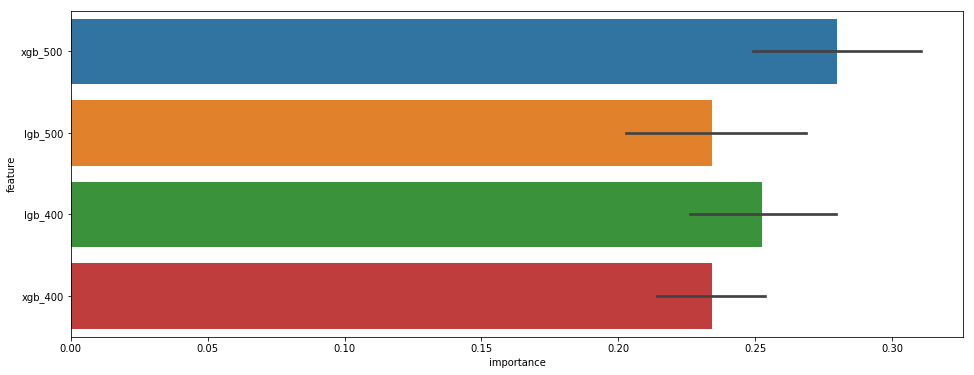

In [78]:
fig = plt.figure(figsize=(16, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_stack.sort_values(by='importance', ascending=False))
plt.show()

In [80]:
train_stack

,lgb_500,lgb_400,xgb_400,xgb_500
0,6.326066,5.251891,4.899118,4.935854
1,5.437608,4.655252,3.695216,5.047163
2,3.675957,3.265764,2.975672,3.522271
3,4.572775,5.287550,4.781065,4.253610
4,3.881295,5.233468,4.878295,4.237889
5,4.760027,5.166783,5.031924,4.924250
6,3.397550,4.055442,4.075199,3.711592
7,6.466832,6.434413,5.879005,5.791283
8,2.869696,2.088311,2.552599,2.533076
9,2.816110,2.475354,2.865791,2.881930
